# Welcome to Correlation!
In this notebook, we will explore the concept of correlation through a real-world dataset. We'll learn how to perform a simple linear regression and test our dataset to see how it aligns with the assumptions underlying this statistical technique. Finally, we'll also talk about "spurious correlations," which is something that you need to watch out for as a data scientist!

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

let's go back to the city dataset we analyzed earlier

In [4]:
dict = {
    "state": ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
        "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
        "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
        "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
        "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
        "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
        "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
        "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"],
    "capital": ["Montgomery", "Juneau", "Phoenix", "Little Rock", "Sacramento", "Denver",
        "Hartford", "Dover", "Tallahassee", "Atlanta", "Honolulu", "Boise", "Springfield",
        "Indianapolis", "Des Moines", "Topeka", "Frankfort", "Baton Rouge", "Augusta", "Annapolis",
        "Boston", "Lansing", "Saint Paul", "Jackson", "Jefferson City", "Helena",
        "Lincoln", "Carson City", "Concord", "Trenton", "Santa Fe", "Albany",
        "Raleigh", "Bismarck", "Columbus", "Oklahoma City", "Salem", "Harrisburg",
        "Providence", "Columbia", "Pierre", "Nashville", "Austin", "Salt Lake City",
        "Montpelier", "Richmond", "Olympia", "Charleston", "Madison", "Cheyenne"],
    "area": [159.8, 2716.7, 517.6, 116.2, 97.9, 153.3, 17.3, 22.4, 95.7, 
        133.5, 68.4, 63.8, 54.0, 361.5, 75.8, 56.0, 14.7, 76.8, 55.4, 6.73,
        89.6, 35.0, 52.8, 104.9, 27.3, 14.0, 74.6, 143.4, 64.3, 7.66, 37.3, 
        21.4, 114.6, 26.9, 210.3, 620.3, 45.7, 8.11, 18.5, 125.2, 13.0, 
        525.9, 305.1, 109.1, 10.2, 60.1, 16.7, 31.6, 68.7, 21.1],
    "population": [200, 31, 1660, 194, 509, 716, 125, 36, 181, 498, 360, 
        206, 116, 867, 203, 127, 26, 225, 19, 38, 694, 114, 285, 174, 43,
        28, 258, 55, 43, 85, 76, 98, 404, 61, 893, 649, 155, 50, 178, 129,
        14, 691, 964, 186, 8, 204, 46, 51, 233, 59]
}
capital_data = pd.DataFrame(dict)
capital_data

,state,capital,area,population
0,Alabama,Montgomery,159.80,200
1,Alaska,Juneau,2716.70,31
2,Arizona,Phoenix,517.60,1660
3,Arkansas,Little Rock,116.20,194
4,California,Sacramento,97.90,509
5,Colorado,Denver,153.30,716
6,Connecticut,Hartford,17.30,125
7,Delaware,Dover,22.40,36
8,Florida,Tallahassee,95.70,181
9,Georgia,Atlanta,133.50,498


is there a correlation between US State Capital area and population?
* population density of a city is relatively constant
* more area, more people

In [6]:
# linregress(x, y) # x is the independent variable, y is the dependent variable
slope, intercept, r, p, se = linregress(capital_data['area'], capital_data['population'])

In [8]:
def predict_population(area):
    predicted_area = slope*area + intercept
    return predicted_area

predict_population(305.10)

286.11646996150256

at first glance, it doesn't seem like it. our r-squared value is just about 0.03, indicating an extremely weak / insignificant relationship. but let's visualize the data just to make sure...

In [10]:
r**2
# r close to -1 or 1 --> you have a nearly perfect (negative/positive) correlation
# r close to 0.6 to 0.8 (+/-) you have a moderate correlation
# r close to 0 you have a weak correlation
# r**2 shows the fraction of variability in the dataset that's explained by x

0.029262449081312248

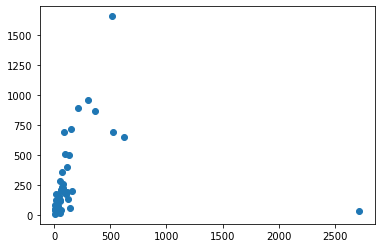

In [11]:
plt.scatter(capital_data['area'], capital_data['population'])
# Juneau, Alaska is the largest state capital

wow! it looks like we have a spurious point, where the state capital is almost 3000 square miles in area. let's try to spot this in our data frame

In [13]:
mask = capital_data['area'] > 2000
capital_data[mask]

,state,capital,area,population
1,Alaska,Juneau,2716.7,31


it seems like if we get rid of this one point, then we might see a relationship. let's investigate and see

In [16]:
capital_data_clean = capital_data.drop(1)
slope, intercept, r, p, se = linregress(capital_data_clean['area'], capital_data_clean['population'])
r**2

def predict_population(area):
    predicted_area = slope*area + intercept
    return predicted_area

predict_population(305.10)

645.0055766585348

sweet! this is a much stronger result--indicating a moderate relationship. is there any way that we can get the average population density of the capitals from our regression? (hint: the units will be people per square area)

In [17]:
slope

1.8746771081021059

Are there cases when we cannot perform a linear regression? **Absolutely**
1. if variation is too low in either dimension (not the case for us)
2. if the residuals are not normally distributed (we will test this below)
3. if the dataset is heteroscedasticity (what's that?)
4. if the correlation is spurious (check this out: http://www.tylervigen.com/spurious-correlations)


## testing our residuals
to test our residuals, we will generate predictions of the population based on area using our linear regression model. then, we'll subtract the real population values from those predictions.

(array([ 1.,  1.,  1.,  4., 26.,  8.,  3.,  2.,  2.,  1.]),
 array([-586.90380113, -466.55086723, -346.19793333, -225.84499943,
        -105.49206553,   14.86086837,  135.21380227,  255.56673617,
         375.91967007,  496.27260397,  616.62553787]),
 <BarContainer object of 10 artists>)

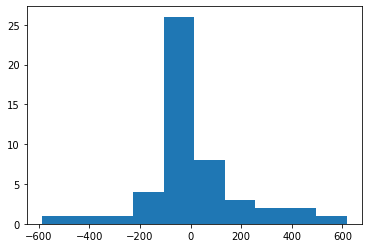

In [18]:
# real population values (dependent values, y)
pop = capital_data_clean['population']

# real area values (independent values, x)
area = capital_data_clean['area']

# predicted population values (predicted dependent values, y_pred)
pop_pred = slope*area + intercept

# residuals are the difference y - y_pred
residuals = pop - pop_pred

plt.hist(residuals)

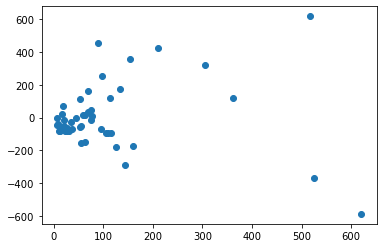

In [19]:
plt.scatter(area, residuals)